In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil 
import random 
import glob
import matplotlib.pyplot as plt
import warnings 
from pathlib import Path
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Nums GPUs available:',len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0],True)


Nums GPUs available: 0


In [3]:
ls

Untitled.ipynb  data/


In [4]:
os.chdir('data')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    

files = [file for file in os.listdir('Cat') if os.path.isfile(os.path.join('Cat', file))]
for x in range(500):
            file = random.choice(files)
            files.remove(file)
            shutil.move(os.path.join('Cat', file),'train/cat' )
for x in range(100):
            file = random.choice(files)
            files.remove(file)
            shutil.move(os.path.join('Cat', file),'valid/cat' )
for x in range(50):
            file = random.choice(files)
            files.remove(file)
            shutil.move(os.path.join('Cat', file),'test/cat' )
files = [file for file in os.listdir('Dog') if os.path.isfile(os.path.join('Dog', file))]
for x in range(500):
            file = random.choice(files)
            files.remove(file)
            shutil.move(os.path.join('Dog', file),'train/dog' )
for x in range(100):
            file = random.choice(files)
            files.remove(file)
            shutil.move(os.path.join('Dog', file),'valid/dog' )
for x in range(50):
            file = random.choice(files)
            files.remove(file)
            shutil.move(os.path.join('Dog', file),'test/dog' )
            
            


In [5]:

os.chdir("..")

In [6]:
ls

Untitled.ipynb  data/


In [7]:
train_path='data/train'
valid_path='data/valid'
test_path='data/test'

In [8]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
imgs, labels=next(train_batches)

In [10]:
def plotImages(images_arr):
    fig, axes= plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

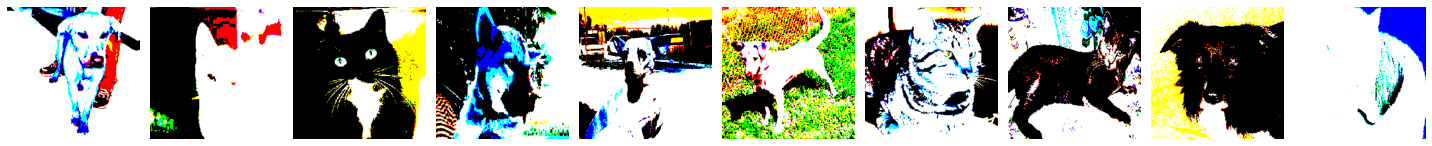

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [11]:
plotImages(imgs)
print(labels)

In [12]:
model=Sequential([
                 Conv2D(filters=32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=(224,224,3)),
                 MaxPool2D(pool_size=(2,2),strides=2),
                 Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same',activation='relu'),
                 MaxPool2D(pool_size=(2,2),strides=2),
                 Flatten(),
                 Dense(units=2, activation='softmax'),]
                )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
Epoch 1/10
200/200 - 49s - loss: 18.4532 - acc: 0.5360 - val_loss: 0.6714 - val_acc: 0.5625
Epoch 2/10
Epoch 1/10
200/200 - 49s - loss: 0.6087 - acc: 0.6670 - val_loss: 0.6705 - val_acc: 0.5950
Epoch 3/10
Epoch 1/10
200/200 - 53s - loss: 0.4384 - acc: 0.8050 - val_loss: 0.8559 - val_acc: 0.6275
Epoch 4/10
Epoch 1/10
200/200 - 53s - loss: 0.2056 - acc: 0.9210 - val_loss: 0.9667 - val_acc: 0.5675
Epoch 5/10
Epoch 1/10
200/200 - 53s - loss: 0.0844 - acc: 0.9745 - val_loss: 1.4955 - val_acc: 0.5650
Epoch 6/10
Epoch 1/10
200/200 - 54s - loss: 0.1552 - acc: 0.9545 - val_loss: 1.5407 - val_acc: 0.5775
Epoch 7/10
Epoch 1/10
200/200 - 54s - loss: 0.0845 - acc: 0.9685 - val_loss: 1.5466 - val_acc: 0.5675
Epoch 8/10
Epoch 1/10
200/200 - 55s - loss: 0.0307 - acc: 0.9935 - val_loss: 2.1700 - val_acc: 0.5725
Epoch 9/10
Epoch 1/10
200/200 - 56s - loss: 0.0279 - acc: 0.9945 - val_loss: 2.9319 - val_acc: 0.5750
Epoch 10/10
Epoch 1/10
200/200 - 57s - loss: 0.1023 - acc: 0.9665 - val_loss: 1.9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

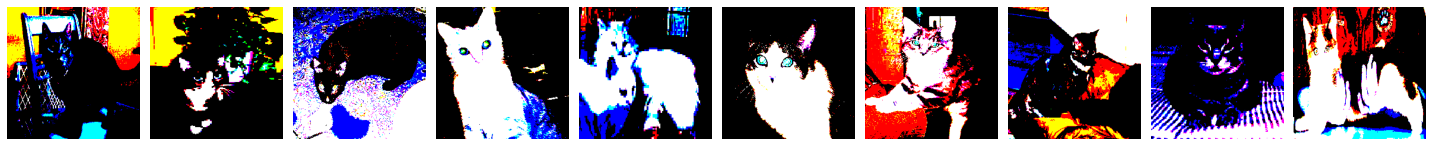

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [16]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [17]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [18]:
predictions=model.predict(x=test_batches,verbose=0)

In [19]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [20]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions, axis=-1))

In [21]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='ConfusionMatrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without Normalisation")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   

In [22]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without Normalisation
[[59 41]
 [47 53]]


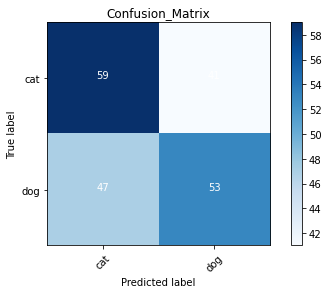

In [23]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion_Matrix')